Optimal Path Found: [(0, 0), (0, 1), (0, 2), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (2, 8), (3, 8), (4, 8), (5, 8), (6, 8), (7, 8), (8, 8), (9, 8), (9, 9)]


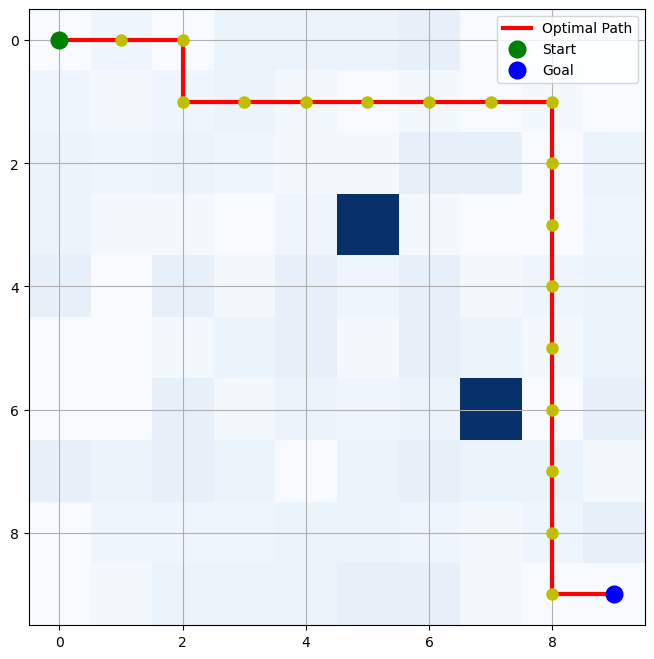

In [13]:
import matplotlib.pyplot as plt
import random
import heapq
import itertools


class Node:
    def __init__(self, x, y, road_cost=1):
        self.x = x
        self.y = y
        self.road_cost = road_cost
        self.parent = None


def heuristic(a, b):
    return abs(a.x - b.x) + abs(a.y - b.y) + a.road_cost


def get_neighbors(node, grid):
    neighbors = []
    rows, cols = len(grid), len(grid[0])
    directions = [(-1,0),(1,0),(0,-1),(0,1)]
    for dx, dy in directions:
        nx, ny = node.x + dx, node.y + dy
        if 0<=nx<rows and 0<=ny<cols:
            neighbors.append(grid[nx][ny])
    return neighbors


def a_star(start, goal, grid):
    open_set = []
    counter = itertools.count()  # Tie-breaker for heap
    heapq.heappush(open_set, (0, next(counter), start))
    g_score = {start: 0}

    while open_set:
        _, _, current = heapq.heappop(open_set)
        if current == goal:
            return reconstruct_path(current)

        for neighbor in get_neighbors(current, grid):
            tentative_g = g_score.get(current, float('inf')) + neighbor.road_cost
            if tentative_g < g_score.get(neighbor, float('inf')):
                neighbor.parent = current
                g_score[neighbor] = tentative_g
                f_score = tentative_g + heuristic(neighbor, goal)
                heapq.heappush(open_set, (f_score, next(counter), neighbor))
    return None


def reconstruct_path(node):
    path = []
    while node:
        path.append((node.x, node.y))
        node = node.parent
    return path[::-1]


def create_city(rows, cols):
    return [[Node(i, j, road_cost=random.randint(1,5)) for j in range(cols)] for i in range(rows)]


def block_road(grid, x, y, new_cost=50):
    grid[x][y].road_cost = new_cost


def plot_path(grid, path, start, goal):
    rows, cols = len(grid), len(grid[0])
    plt.figure(figsize=(8,8))
    cost_matrix = [[grid[i][j].road_cost for j in range(cols)] for i in range(rows)]
    plt.imshow(cost_matrix, cmap='Blues', origin='upper')

    if path:
        px, py = zip(*path)
        plt.plot(py, px, 'r-', linewidth=3, label="Optimal Path")
        plt.plot(py, px, 'yo', markersize=8)

    plt.plot(start.y, start.x, 'go', markersize=12, label='Start')
    plt.plot(goal.y, goal.x, 'bo', markersize=12, label='Goal')
    plt.legend()
    plt.grid(True)
    plt.show()


if __name__ == "__main__":
    rows, cols = 10, 10
    city = create_city(rows, cols)

    start = city[0][0]
    goal = city[9][9]

    # Example blockages
    block_road(city, 3, 5)
    block_road(city, 6, 7)

    path = a_star(start, goal, city)
    if path:
        print("Optimal Path Found:", path)
        plot_path(city, path, start, goal)
    else:
        print("No path found!")
